# A Tutorial on LTI systems

A LTI system is a system that is **L**inear and **T**ime **I**nvariant. These properties will be defined soon!

## What is a dynamical system?

Our objective is to understand the key concepts of dynamical systems theory
for the special case of when the system dynamics are **linear** and **fully deterministic**.

We first have to destinguish between real-world systems and system models.  
For example any kind of machine is a real-world system. Any machine component can be considered a subsystem.  
On the other hand, the term *dynamical system* usually refers to a **mathematical model of a dynamic process**.

<img src="images/SystemDefinition.png" alt="dynamical system" style="width: 800px; margin-left: auto; margin-right: auto;"/>

The **system boundary**, which can theoretically be drawn arbitrarily, defines what parts and mechanisms belong to the system under study.  
For real-world systems all kinds of quantities (eg. mass, heat, mechanical work, electrical current, ...) can cross the system boundaries.  
In the case of dynamical systems (i.e. mathematical models) **only information enters (inputs) and leaves (outputs) the system**.

## Inputs and outputs of a system

Any kind of quantity that one could theoretically measure in a real-world system can be an output of the corresponding system model. Hence, outputs are signals that depend on the system's internal state. In some cases outputs are not just functions of the internal state but also depend directly (without delay) on the input signals (direct feed-through).
Output signals are used to feed inputs of other systems (i.e. to model interaction between systems) or they are merely quantities that one ultimately wants to model/simulate/predict.

Any kind of quantity that does not depend on the system's internal state can be an input to the system. 
Hence, inputs are signals that are fully determined by other systems external to the system under study. They may also be considered properties of the system's environment.  

For example a building and it's heating system can be modeled as a dynamical system. Then the outside temperature is a system input because it does not depend on the state of the building but has an influence on it. System outputs can for example be the room temperatures, the current heating power and the total ammount of consumed fuel.

As another example consider an electrical motor as one system and an *ideal* voltage source as another system.  

The voltage at the motor's terminals is an input of the motor model because it does not depend on the state of the motor, i.e. it does in particular not depend on the ammount of current that the motor draws from the source. If the voltage source is *not ideal* then the voltage source model needs to adapt its voltage output according to the current that is drawn from it.  

The ammount of current that the motor draws is an output of the motor model that is fed into the voltage source model, so that it can output the physically correct voltage.  

This example makes clear the nature of inputs an outputs of system models: Despite the fact that in a physical sense power flows via electircal current from the source to the motor, it is the voltage source model that consumes the information about the current draw from the motor model.

<img src="images/MotorExample.png" alt="non-ideal voltage source and electrical motor" style="width: 500px; margin-left: auto; margin-right: auto;"/>

**SISO and MIMO systems:**
- A system with only one input and one output is called a single-input single-output system or in short a SISO system.
- A system with multiple inputs and multiple outputs is called a multiple-input multiple-output system or in short a MIMO system.

## Internal state of the system

Every dynamical system has an internal state, which contains information about the **degrees of freedom** that system. Of course this does not have to include all degrees of freedom that exist. One only needs to model what is actually considered interesting enough.

The state of the dynamical system at some point in time is encoded by a tuple of $n$ real numbers. These numbers form a vector, the so called state vector $\underline{x}$ of the system. The underlying vector space is called the state space of the system. This can be some Euclidian space ($\underline{x} \in \mathbb{R}^n$) or in theory any kind of geometric manifold.

The state of a system at time $t=0$ is called the initial state $\underline{x}_0$ of the system. If one in not only interested in steady-state behavior of the system (given some input) but in the transient behavior then it is important to specify the initial state of the system.

### example of a dynamical system and its state space

<img src="images/PendulumExample.png" alt="dynamical system (pendulum example)" style="width: 600px; margin-left: auto; margin-right: auto;"/>

Note that if we would have considered a pendulum on a string of fixed length then the position of the mass would naturally be measured in terms of an angle.  
Since the position is then invariant to addition of $2 \pi$ one might argue that the natural choice for the state space is the surface of a cylinder (Riemannian manifold). In the sequel we will only consider Euclidian state space definitions.

### evolution of the state

The internal state gets updated (either in continous or discrete time) according to the **evolution rule** of the system. In the continuous-time case the evolution of the state as a (continuous, vector-valued) function of time $\underline{x}(t)$ is called the trajectory of the system (for a given initial state $\underline{x}_0$ and input signals $\underline{u}(t)$). In the discrete-time case the evolution of the state is given by a series of state vectors $\underline{x}_0, \, \underline{x}_1, \dots$.

In our case (finite-dimensional state space, deterministic and linear dynamics) the evolution rule can be expressed as a tuple of two matrices $(\underline{\underline{A}}, \, \underline{\underline{B}} )$, i.e. the evolution rule is given by two finite-dimensional linear operators. This holds in both the continuous and the discrete time case.

The first matrix $\underline{\underline{A}}$ is a square matrix and describes how future states are affected by current states.  

The second matrix $\underline{\underline{B}}$ describes how future states are affected by the system inputs.

More on this soon!

## Linearity

Consider a map $L : V \mapsto W$ where $V$ and $W$ are $K$-vector spaces.
In our case the scalar field are the real numbers, i.e. $K = \mathbb{R}$.

$L$ is a linear map if and only if it has two properties, namely
- **additivity**: $L(u + v) = L(u) + L(v)$ with $u,v \in V$
- **homogeneity**: $L(\alpha \cdot v) = \alpha \cdot L(v)$ with $\alpha \in K$

From this definition it follows that $L(0_V) = 0_W$ and that $L(-v) = -L(v)$.

In the terminology of systems theory **superposition principle** means that if the input signal $u$ of a linear system produces the output signal $y_1$ and the input $v$ produces the output $y_2$, when fed to the system independently, then the input signal $(u+v)$ (adding signals before feeding them to the system) produces the output signal $(y_1+y_2)$.  

The superposition principle allows for straightforward **decomposition** and **synthesis** of signals.

### superposition principle illustrated by a block diagram

$$
\alpha \cdot L \left( u \right) + \beta \cdot L \left( v \right) = L \left( \alpha \cdot u + \beta \cdot v \right)
$$

<img src="images/Linearity.png" alt="superposition principle explained by a block diagram" style="width: 800px; margin-left: auto; margin-right: auto;"/>

## Continous-time and discrete-time LTI systems

In our reality time is considered a continuous quantity but because digital signal aquisition and processing relies on sampling of signals it makes a lot of sense to also think about discrete-time systems.

### continous-time systems

In the continous-time case the dynamical system is usually written as a **system of first order linear ordinary differential equations**.

The general model for a system without inputs is    
$$
\dot{\underline{x}}(t) = \underline{\underline{A}} \, \underline{x}(t)
$$

$$
\underline{y}(t) = \underline{\underline{C}} \, \underline{x}(t)
$$

And for a system with inputs $\underline{u} = \left[u_1, \, \dots, \, u_m \right]^{\mathrm{T}}$ we have  
$$
\dot{\underline{x}}(t) = \underline{\underline{A}} \, \underline{x}(t) + \underline{\underline{B}} \, \underline{u}(t)
$$  

$$
\underline{y}(t) = \underline{\underline{C}} \, \underline{x}(t) + \underline{\underline{D}} \, \underline{u}(t)
$$

In many cases we have $\underline{\underline{D}} = \underline{\underline{0}}$ because inputs do not have a direct (instantaneous) effect on the outputs (no direct feed-through).

The system is called **time-invariant** because the dynamic behavior of the system does not change over time, i.e. $\underline{\underline{A}},\underline{\underline{B}},\underline{\underline{C}},\underline{\underline{D}}$ are constant matrices instead of matrix-valued functions of time.

It helps to remember that $\underline{\underline{A}}$ is usually referred to as the system matrix and $\underline{\underline{B}}$, $\underline{\underline{C}}$ may be called the input matrix and output matrix, respectively.  
Note that for a SISO system $\underline{\underline{C}}$ reduces to a row vector and $\underline{\underline{B}}$ reduces to a column vector.

Also note that any higher-order (say order $n$) **o**rdinary **d**ifferential **e**quation (ODE) can be written as a system of $n$ first-order ODEs by introducing $n-1$ additional variables.  
For example in the case of the pendulum we start with the second order ODE
$$
m \cdot \ddot{x} + c \cdot x = 0 \: .
$$
We then set $x_1 := x$ and introduce the additional variable $x_2 := \dot{x}$.  
Hence, we can write the balance of linear momentum as a first order ODE in $x_2$. We get the first oder system
$$
\dot{x}_1 = x_2 \quad , \quad \dot{x}_2 = - \frac{c}{m} \cdot x_1 \: .
$$

### discrete-time systems

In the contexts of digital control, computer simulations and system identification (based on discrete-time sensor signals) it might be more natural to work directly with discrete time models of LTI systems.

In this case all signals are only defined at equally spaced points in time.
We write for example $\underline{x}_k$ instead of $\underline{x}(k \cdot \Delta t)$ where $\Delta t$ is the the sampling period or the inverse of the sampling frequency and $k \geq 0$ is an integer that denotes a specific sample of the signal.

In the discrete-time case the dynamical system is written as a **system of linear first order difference equations**.

The general model for a system without inputs is  
$$
\underline{x}_{k+1} = \underline{\underline{A}} \, \underline{x}_{k}
$$  

$$
\underline{y}_k = \underline{\underline{C}} \, \underline{x}_{k}
$$

And for a system with inputs $\underline{u} = \left[u_1, \, \dots, \, u_m \right]^{\mathrm{T}}$ we have  
$$
\underline{x}_{k+1} = \underline{\underline{A}} \, \underline{x}_{k} + \underline{\underline{B}} \, \underline{u}_{k}
$$ 

$$
\underline{y}_k = \underline{\underline{C}} \, \underline{x}_{k} + \underline{\underline{D}} \, \underline{u}_{k}
$$

### converting continuous-time systems to discrete-time systems

Physical modeling is usually based on differential equations. It may be useful to convert a continuous-time model to a corresponding discrete-time model.

The state of a discrete-time model gets updated only at the sampling instances and therefore the conversion relies on the assumption that the input also changes only at the sampling instances and is constant inbetween (sample & hold).  
As long as $\Delta t \ll T$, with $T$ the smallest time constant (of interest), this assumption is not too bad. Here $\Delta t$ is the time scale of the sampling process and $T$ is the time scale on which the fastest system dynamics (of interest) evolve. The precise meaning of the term time constant will be introduced in **TODO**.

The linear operators of the discrete-time system will be denoted as $\underline{\underline{A}}$, $\underline{\underline{B}}^{\mathrm{D}}$, $\underline{\underline{C}}^{\mathrm{D}}$, $\underline{\underline{D}}^{\mathrm{D}}$,  
and the operators of the original continuous-time system will be denoted as $\underline{\underline{A}}$, $\underline{\underline{B}}$, $\underline{\underline{C}}$, $\underline{\underline{D}}$. Then we have

$\underline{\underline{A}}^{\mathrm{D}} = \underline{\underline{\Phi}}(\Delta t)$  
$\underline{\underline{B}}^{\mathrm{D}} = \bigl( \int_{\tau=0}^{\Delta t} \underline{\underline{\Phi}}(\tau) \, \mathrm{d}\tau \bigr) \cdot \underline{\underline{B}}$  
$\underline{\underline{C}}^{\mathrm{D}} = \underline{\underline{C}}$  
$\underline{\underline{D}}^{\mathrm{D}} = \underline{\underline{D}}$

The relationship is expressed in terms of the state-transition matrix $\underline{\underline{\Phi}}(t) := \underline{\underline{\Phi}}(t,t_0 = 0)$. This matrix expresses the solution of the LTI system.  
Any future state of the system can be written as
$$
\underline{x}(t) = \underline{\underline{\Phi}}(t,t_0) \cdot \underline{x}(t_0) \: .
$$

## Applications of LTI systems theory

### applications that we will consider in this tutorial
- physical modelling: create state-space models from first principles
- simulation of the state-space system with given initial state and input signals
- steady-state behavior (frequency response, resonances, anti-resonances)
- stability analysis
TODO: check this list again!

### other interesting applications
- system identification: building models based on measurement data (and someties physical insight)
- state estimation of systems: e.g. Kalman filter
- many many more ...

## The role of LTI systems within systems theory (and control engineering)

LTI systems are ubiquitos! The theory is very straightforward compared to nonlinear dynamical systems theory.  
In contrast to nonlinear dynamical systems, linear systems have for example a closed-form solution (given by the state-transition matrix)! 

Luckily almost any nonlinear system can be approximated locally by a linear system.
Here *locally* means that the linearized system is a good approximation of the behavior of the nonlinear system within a neighborhood of an equilibrium point. This implies that (meaningful) linearizations are found by first computing equilibrium points and then linearizing the system around one such equilibrium point. A simple example is given in the next section. Note that feedback control can be used to change the placement of equilibrium points! This means that the equilibrium points of the resulting closed-loop system will (intentionally) be different from those of the uncontrolled system.

**Conclustion**:   
A good understanding of linear systems is necessary. It is sometimes sufficient to solve the problems at hand and other times it is an important first step to understanding a more complex nonlinear system.

## Real systems

Models of real physical systems often have nonlinear dynamics and they often have an infinite-dimensional or high-dimensional state space.

### nonlinear systems (an example)

In a strict sense most systems are actually nonlinear systems.
A trivial example is again the pendulum on a string of fixed length.

<img src="images/StringPendulumExample.png" alt="pendulum on a string" style="width: 170px; margin-left: auto; margin-right: auto;"/>

This system is nonlinear because the (green) component of $F_g$ has magnitude $F_g \cdot \sin(\varphi)$,  
i.e. the force that determines the movement of the pendulum is a nonlinear function of position.

Assuming a lumped mass we get the nonlinear model from conservation of angular momentum: 
$r^2 \cdot m \cdot \ddot{\varphi} = - m \cdot g \cdot \sin(\varphi) \cdot r$

With $\omega = \dot{\varphi}$ we rewrite the equation and obtain: 
$\dot{\omega} = - \frac{g}{r} \cdot \sin(\varphi)$

Rewriting as a matrix equation we get the nonlinear state-space model:

$$
\begin{bmatrix}
\dot{\varphi} \\
\dot{\omega}
\end{bmatrix}
=
\begin{bmatrix}
\omega \\
-\frac{g}{r} \cdot \sin(\varphi)
\end{bmatrix}
$$

#### linearizing the nonlinear system

In order to linearize the system around an equilibrium point we simply need to do a **Taylor series expansion** of all nonlinear terms around that equilibrium point but only up to the linear term of the series. Then all linear terms together form the linearized sytem. Linearizing around a state that is not an equilibrium point is not useful! 

We will do the linearization for the above example: Equilibrium points are found by setting $\underline{\dot{x}}$ to zero. Here we have the distinct equilibrium points $\varphi = 0$ and $\varphi = \pi$ (with $\omega = 0$ in both cases). We choose to linearize about the equilibrium point $\varphi_0 = 0$. We only have one linear term $\sin(\varphi)$ for which we need to do a Taylor series expansion up to the first order term. We get $\sin(\varphi) \approx \sin(\varphi_0) + \frac{\mathrm{d}\sin(\varphi)}{\mathrm{d} \varphi} \bigg\rvert_{\varphi = \varphi_0} \cdot (\varphi - \varphi_0) = \varphi - \varphi_0 = \Delta \varphi$

Note that $\dot{\varphi} = \Delta \dot{\varphi}$, $\dot{\omega} = \Delta \dot{\omega}$, because the equilibrium point $\underline{x}_0 = \left[ \varphi_0 \; \omega_0 \right]^\mathrm{T} = \left[ 0 \; 0 \right]^\mathrm{T}$, about which we linearize, is constant.  

We obtain the linearized (LTI) system

$$
\begin{bmatrix}
\Delta \dot{\varphi} \\
\Delta \dot{\omega}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
-\frac{g}{r} & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
\Delta \varphi \\
\Delta \omega
\end{bmatrix}
$$

which describes the dynamics of the pendulum for small deviations from the equilibrium point.

We can **use the linearized system to assess the stability of the equilibrium point of the nonlinear system**.  

This means we want to answer the following question: What happens if the system is in the equilibrium point and then some small pertubation moves the system a bit away from equilibrium?

<img src="images/EquilibriumStability.png" alt="stable and instalbe equilibrium points" style="width: 600px; margin-left: auto; margin-right: auto;"/>

To answer this, we compute the eigenvalues of $\underline{\underline{A}}$. If we assume for simplicity of the example that $\frac{g}{r} = 1$ then the eigenvalues will turn out to be $\pm i$. Imaginary eigenvaules mean that the system will osciallate. Here the real part is zero which means the oscillations neither decay (negative real part) nor grow (positive real part). Therefore we call the equilibrium point marginally stable. Eigenvalues and complex numbers will be covered in more detail later.

#### examples of some general nonlinear dynamical phenomena

Nonlinear systems can show very interesting and maybe unexpected dynamical behavior.  
If you are curious you may look up the following terms:
- limit cycles (periodic orbits in state space)
- multiple attractors (either limit cycles or equilibrium points)
- chaos (the trajectory of the system in state space is highly sensitive to the initial state)
- bifurcations (qualitative change of system dynamics produced by varying system parameters or inputs)

### infinite-dimensional state space

Many real systems are naturally described by an infinite-dimensional state-space model. This is for example the case when a system model comes from continuum mechanics. As an example picture a vibrating beam or plate.  
In a sense, infinite-dimensional state-space models and partial differential equations (PDEs) can be considered the same thing in our context.

For the sake of simplicity and to speed up computaion, it is our goal to convert such models to finite-dimensional state-space models without loosing too much fidelity. That means we want to obtain a much simpler model from a computational standpoint that retains the dynamics which are relevant for our purpose. There exist various methods to convert PDEs into nearly equivalent ODEs. The most widely used out of these is probably the finite element method (FEM).

### high-dimensional state space

High-dimensional state-space models are not necessarily a problem. In some applications like digital control it is desirable to work with a low-dimensional LTI model because of constrained computing resources on the controller and also because control output needs to be generated in real-time. Reducing the dimensionality of a model can also aid better understanding of the system dynamics because in that process coherent structures in state space are identified.

There exist numerous algorithms to compute reduced order models. Among them are POD, BPOD, ERA and DMD.  
Note that these algorithms are not only useful for obtaining low-dimensional models of discretized PDEs but they can also be applied to system identification problems. This can for example mean to infer low-dimensional linear operators $\underline{\underline{A}}, \, \underline{\underline{B}}, \, \underline{\underline{C}}$ given impulse response data obtained from simulations or experiments by using the ERA algorithm. The term impulse response is defined in the next section.

## Impulse and impulse response

In practice an **impulse** is a super short and spikey signal.  
For example in structural mechanics, feeding a force input of a system with an impulse signal usually means hitting the right position of the structure with a hammer.  
The response of the system to such an impulse is called the **impulse response of the system**. In practice the impulse response is usually a digital signal (time series data) obtained from experiments (physical system) or from simulations (model).

The **input-output dynamics of a SISO LTI system are fully described by its impulse response**!  
Note that there exist various SISO state-space models that produce the same input-output dynamics.

In general, every input-output pair of a MIMO system corresponds to a different impulse response. Again the input-output dynamics of a MIMO LTI system are fully described by the set of all its impulse responses.

The **Dirac delta distribution** $\delta(t)$ is a mathematical idealization of an impuls signal. Actually $\delta(t)$ is not a function of $t$ in a rigorous sense but it is called a distribution!  
The meaning of this is given implicitly by

$$
\langle \delta , \phi \rangle = \int_{-\infty}^{+\infty} \delta(t) \cdot \phi(t) \, \mathrm{d}t \overset{\mathrm{def.}}{=} \phi(0) \: ,
$$

where $\phi(t) \in C^{\infty}$ is a test function with compact support (and otherwise arbitrary).  
Roughly speaking, this means that $\delta(t)$ is different from $0$ only at $t=0$ but it still integrates to $1$.

In a discrete-time setting we use instead the **unit impulse** signal
$$
\delta_k =
  \begin{cases}
    1 & \text{for } k = 0 \\
    0 & \text{otherwise}
  \end{cases}
$$  

The unit impulse signal can also be defined as $\delta_k := \delta_{k,0}$ where on the right-hand side we have the **Kronecker delta**.

## Step and step response

A **unit step function** (also **Heaviside step function**) is a signal that switches on at a certain time (usually $t=0$) and stays switched on indefinetly. It is a signal that changes from $0$ to $1$ in a very short time.  
The response of the system to such a step function is called the **step response of the system**.

In a **discrete-time** setting the unit step is usually defined as
$\sigma_k =
  \begin{cases}
    0            & \text{for } k < 0 \\
    1            & \text{for } k \geq 0
  \end{cases}$

Note that $\delta_k = \sigma_k - \sigma_{k-1}$, i.e. the discrete-time impulse is the first difference of the discrete-time step. The other way round, we have $\sigma_k = \sum_{i=-\infty}^{k} \delta_i$, i.e. the discrete-time step is the cumulative summation of the discrete-time impulse. The same relationships holds between the step response and the impulse response.

Also note that there exist other definitions such as a step that has the value $0.5$ for $k=0$ (half-maximum convention).

In the **continuous-time** case the unit step function is usually defined as
$\sigma(t) =
  \begin{cases}
    0            & \text{for } t < 0 \\
    1            & \text{for } t \geq 0
  \end{cases}$

Note that $\delta(t) = \dot{\sigma}(t)$, i.e. the Dirac impulse is the first (distributional) derivative  of the continuous-time step function. The other way round, we have

$$
\sigma(t) = \int_{\tau=-\infty}^{t} \delta(\tau) \: \mathrm{d}\tau \: ,
$$

i.e. the continuous-time step function is the integral of the Dirac impulse. The same relationships holds between step response and impulse response.

Also note that there exist other definitions such as analytic (smooth) approximations of a step.

The **step response** is the time integral (or cumulative sum) of the impulse response. This follows from the LTI properties of the system and the derivative being a linear operator.
This means that the step response, just like the impulse resonse, contains full information about the input-output dynamics of a LTI system. In practice though, measuring the imulse response may not lead to the same result as measuring the step response. For example it may be easier to apply a (nearly ideal) step input. But taking the derivative of the step response signal will usually amplify the noise which is present in the measured response. There exist various direct and indirect measurment techniques to obtain the impulse response data of a system.

## Convolution

<img src="images/SISO-convolution.png" alt="SISO convolution" style="width: 700px; margin-left: auto; margin-right: auto;"/>

Convolution is a mathematical operation that computes the output $y$ of a LTI system given its impulse response $h$ and an input $u$.

Note that in this section examples are based on SISO systems but the same reasoning applies to MIMO systems.

Making sense of convolution is particularly easy for the discrete-time case, that we will consider first.

A discrete-time signal can be decomposed into a sum of unit impulses, which are shifted appropriately in time.
Consider for example the input signal

$$
\underline{u} = \left[ 1 , 2, 0, 3, 0, 1, 0 \right] \: ,
$$
i.e.
$$
u_0 = 1 ,\, u_1 = 2,\, u_2 = 0,\, u_3 = 3,\, u_4 = 0,\, u_5 = 1,\, u_6 = 0 \: ,
$$
which can also be written as
$$u_k = 1 \cdot \delta_k + 2 \cdot \delta_{k-1} + 3 \cdot \delta_{k-3} + 1 \cdot \delta_{k-5} = \sum_{i=0}^k u_i \cdot \delta_{k-i} \: .
$$

As a **consequence of the superposition principle** we can compute the response of the system to $u$, by first computing the response of the system to each of the shifted impulses individually and then adding up these results. The response to one such summand/impulse is exactly a weighted and time-shifted impulse response. This means we can construct the output $y$ corresponding to input $u$ by adding up weighted and time-shifted impulse-response signals. Note that this is nothing more than yet another way of expressing the meaning of linearity and time-invariance.

This leads us to the formula for **discrete-time** convolution:
$$
y_k = \sum_{i=0}^k u_i \cdot h_{k-i} =: u_k * h_k
$$  
Note that this is almost the same sum as in the decomposition of $u$ from last slide:  
$$u_k = \sum_{i=0}^k u_i \cdot \delta_{k-i} = u_k * \delta_k
$$
Instead of the unit impulse $\delta$ (input) we have the impulse response $h$ (corresponding output).  
Note also that $u_k * h_k = h_k * u_k$.

The convolution operation for **continuous-time** systems is very similar:
$$
y(t) = \int_{\tau = 0}^t u(\tau) \cdot h(t-\tau) \: \mathrm{d}\tau =: u(t) * h(t)
$$  

We will bother about the mathematical details regarding the decomposition of $u(t)$ into infinitely many delta distributions etc.

As a final note, keep in mind that **convolution only describes the output of the system as a consequence of the input**.  
There may also be an additive contribution to the output from the initial condition, i.e. from the system state at $t=0$.

## Exact solution of LTI systems

In the last section we already found the part of the solution that stems from the input. Therefore we will now consider the other part that comes from the initial state.

Recall the ODE for a system without inputs
$\underline{\dot{x}}(t) = \underline{\underline{A}} \, \underline{x}(t)$
and just imagine for a second that $\underline{x}$ and $\underline{\underline{A}}$ were scalars.  
Then with separation of variables (a technique for solving certain types of first order ODEs) we find the almost obvious solution: 
$$
\underline{x}(t) = \exp \left( \underline{\underline{A}} \cdot t \right) \, \underline{x}(0) =: \underline{\underline{\Phi}}(t,0) \cdot \underline{x}(0) =: \underline{\underline{\Phi}}(t) \cdot \underline{x}(0)
$$  

This is no joke! Indeed the structure of the scalar case carries over.
Analogous to the ordinary exponential function, the **matrix exponential** is defined as a power series: 
$$
\exp \left( \underline{\underline{A}} \cdot t \right) = \sum_{k=0}^\infty \frac{1}{k!} \underline{\underline{A}}^k \, t^k
$$

Hence, the exact solution of the continuous-time LTI system
$$
\dot{\underline{x}}(t) = \underline{\underline{A}} \, \underline{x}(t) + \underline{\underline{B}} \, \underline{u}(t)
$$ 
$$
\underline{y}(t) = \underline{\underline{C}} \, \underline{x}(t)
$$
with initial condition $\underline{x}(0) = \underline{x}_0$ is given by
$$
\underline{y}(t) = 
\underline{\underline{C}} \cdot \exp \left( \underline{\underline{A}} \cdot t \right) \cdot \underline{x}_0 + 
\biggl( \underline{\underline{C}} \cdot \exp \left( \underline{\underline{A}} \cdot t \right) \cdot \underline{\underline{B}} \biggr) * \underline{u}(t) = 
\underline{\underline{C}} \cdot \underline{\underline{\Phi}}(t) \cdot \underline{x}_0 + \underline{\underline{h}}(t) * \underline{u}(t) \: ,
$$  
where $\underline{\underline{h}}(t)$ is the impulse response matrix. Its entry $h_{ij}(t)$ is the response of output $i$ to an impulse at input $j$.

If we also include the effect of a direct feed-through given by matrix $\underline{\underline{D}}$ then we have

$$
\underline{y}(t) = 
\underline{\underline{C}} \cdot \exp \left( \underline{\underline{A}} \cdot t \right) \cdot \underline{x}_0 + 
\biggl( \underline{\underline{C}} \cdot \exp \left( \underline{\underline{A}} \cdot t \right) \cdot \underline{\underline{B}} \biggr) * \underline{u}(t) +
\underline{\underline{D}} \cdot \underline{u}(t) =
$$

$$
= 
\underline{\underline{C}} \cdot \exp \left( \underline{\underline{A}} \cdot t \right) \cdot \underline{x}_0 + 
\underline{\underline{C}} \cdot \biggl( \int_0^t \exp \left( \underline{\underline{A}} \cdot (t-\tau) \right) \cdot \underline{\underline{B}} \cdot \underline{u}(\tau) \, \mathrm{d} \tau \biggr) +
\underline{\underline{D}} \cdot \underline{u}(t) \: .
$$  

To make sense of the structure of this equation it helps to read it from right to left.
First focus on the first summand with the initial condition.  
The initial state $\underline{x}_0$ is advanced in time via the matrix exponential and then is transformed to the output space via $\underline{\underline{C}}$.

Now look at the second summand and recall that convolution can be understood as
1. decomposition of each input signal into a series of time-shifted and scaled impulses and
2. synthesis of each output signal by summing up time-shifted and scaled impulse responses.

The impulses - think of short time slices of input signals $\underline{u}$ - are transformed to state-space coordinates via $\underline{\underline{B}}$, where they affect the system in the same way as the initial condition does.

One problem that remains is the infinity of the power series. Should we truncate it? What else can we do?  
We will soon see how we can solve the problem in a more elegant way! (by eigendecomposition of $\underline{\underline{A}}$)

Without much of a surprise anymore, the exact and closed-form solution of the discrete-time LTI system
$$
\underline{x}_{k+1} = \underline{\underline{A}} \cdot \underline{x}_{k} + \underline{\underline{B}} \cdot \underline{u}_{k}
$$  
$$
\underline{y}_k = \underline{\underline{C}} \cdot \underline{x}_{k} + \underline{\underline{D}} \cdot \underline{u}_{k}
$$  
with initial condition $\underline{x}_0$ is given by 
$$
\underline{y}_k = 
\underline{\underline{C}} \cdot \underline{\underline{A}}^k \, \underline{x}_0 + 
\underline{\underline{C}} \cdot \sum_{i=0}^{k-1} \underline{\underline{A}}^{k-i-1} \cdot \underline{\underline{B}} \cdot \underline{u}_{i} +
\underline{\underline{D}} \cdot \underline{u}_k \: .
$$

This result follows directly from recursive application of the algebraic equations that define the system.

## Interlude: mathematical representation of vibrations

Vibrations are periodically occuring changes in a physical system.
Note that there are also stochastic/random vibrations but we will not consider them in this tutorial.
The **complex numbers** are the natural choice to mathematically represent (deterministic) vibrations.

Vibrations are called harmonic if they are sinusoidal in time, i.e. they can be described by a single sine or cosine function (at a fixed point in space). The connection between **harmonic motion**s and the complex numbers is given by **Euler's formula**:

$$
\exp(i \cdot \omega \cdot t) = \cos(\omega \cdot t) + i \cdot \sin(\omega \cdot t)
$$  

Here $\omega = 2 \cdot \pi \cdot f$ is the circular frequency and $i$ is the **unit imaginary number**, i.e. the solution of the quadratic equation $x^2 + 1 = 0$.

The **Fourier theorem** states that every **non-harmonic** but **periodic** motion can be uniquely decomposed into a series of harmonic components (**Fourier series**). This means we can write any periodic function as a weighted sum of complex exponentials. The weights are called Fourier coeffiecients. They encode how much each harmonic contributes to the signal. The expansion in terms of sinusoids rests on the **orthogonality** of $\sin(.)$ and $\cos(.)$, i.e. fact that
$$
\frac{1}{a \cdot \pi} \cdot \int_0^{a \cdot 2 \cdot \pi} \sin(b \cdot t) \cdot \sin(c \cdot t) \, \mathrm{d}t = \delta_{b,c} \quad \forall a,b,c \in \mathbb{Z} \setminus \{ 0 \}  \: ,
$$
$$
\frac{1}{a \cdot \pi} \cdot \int_0^{a \cdot 2 \cdot \pi} \cos(b \cdot t) \cdot \cos(c \cdot t) \, \mathrm{d}t = \delta_{b,c} \quad \forall a,b,c \in \mathbb{Z} \setminus \{ 0 \}
$$
and
$$
\int_0^{a \cdot 2 \cdot \pi} \sin(b \cdot t) \cdot \cos(c \cdot t) \, \mathrm{d}t = 0 \quad \forall a,b,c \in \mathbb{Z} \: .
$$

These can be proved with the help of trigonometric identities.

In [22]:
# confirming the orthogonality by a numerical experiment

import numpy as np
import scipy.integrate

a = 30
b = 10
c = 10

def f(x):
    return np.sin(b*x)*np.sin(c*x)

result, error = scipy.integrate.quad(f, 0, a*2*np.pi)
print(result  / (a*np.pi))
print(error)

1.000000000000001
9.9298347322474e-13


### different ways to write a harmonic vibration

In general harmonic oscillations are characterized by their amplitude $\hat{a}$, their frequency $\omega_\delta$, their phase $\varphi$ and their envelope $-\delta$.  

We can write them in the following equivalent forms:  
$$
a \cdot \cos(\omega_\delta \cdot t - \varphi) \cdot e^{-\delta \cdot t} =
$$

$$
= \bigl( a_c \cdot \cos(\omega_\delta \cdot t) + a_s \cdot \sin(\omega_\delta \cdot t) \bigr) \cdot e^{-\delta \cdot t} =
$$

$$
= \bigl( c \cdot e^{+i \cdot \omega_\delta \cdot t} + \bar{c} \cdot e^{-i \cdot \omega_\delta \cdot t} \bigr) \cdot e^{-\delta \cdot t} =
$$

$$
= c \cdot e^{\lambda \cdot t} + \bar{c} \cdot e^{\bar{\lambda} \cdot t}
$$

with $a, \, a_c, \, a_s \in \mathbb{R}$ and $c, \lambda \in \mathbb{C}$. The bar over $c$ denotes complex conjugation, i.e. $\bar{c} = \Re(c) - i \cdot \Im(c)$.  

The following relationships hold:
$$
a = \sqrt{a_c^2 + a_s^2} \quad ; \quad
\varphi = \arctan \left( \frac{a_s}{a_c} \right)
$$ 

$$
a_c = c + \bar{c} = 2 \cdot \Re(c) = a \cdot \cos \left( \varphi \right) \quad ; \quad
a_s = i \cdot (c - \bar{c}) = -2 \cdot \Im(c) = a \cdot \sin \left( \varphi \right)
$$

$$
c = \frac{1}{2}(a_c - i \cdot a_s)
$$

$$
\lambda = -\delta + i \cdot \omega_\delta
$$

In [15]:
# interactive notebook widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# matrix / tensor computations
import numpy as np

# plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# discretize a time interval
t = np.linspace(start=0,stop=4,num=10000)

def show_vibration(amplitude, phase, frequency, decay):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.title('time domain: oscillation and envelope')
    omega = 2 * np.pi * frequency
    y = amplitude * np.sin(omega * t - phase) * np.exp(-decay * t)
    plt.plot(t,y)
    plt.plot(t,+amplitude*np.exp(-decay * t),color='green', linestyle='dashed')
    plt.plot(t,-amplitude*np.exp(-decay * t),color='green', linestyle='dashed')
    plt.xlabel('time in seconds')
    plt.ylim(-5,5)
    
    plt.subplot(1, 2, 2)
    plt.title('s-plane')
    lambda_ = np.complex(-decay, omega)
    lambda_bar = np.conj(lambda_)
    plt.scatter(lambda_.real, lambda_.imag, color='b')
    plt.scatter(lambda_bar.real, lambda_bar.imag, color='b')
    plt.xlabel('real part')
    plt.ylabel('imaginary part')
    plt.xlim(-1,1)
    plt.ylim(-60,60)
    
    plt.show()

In [16]:
interact(show_vibration, amplitude=(1,3,0.2), phase=(-np.pi,+np.pi,0.1), frequency=(1,10,1), decay=(0,1,0.1));

interactive(children=(FloatSlider(value=2.0, description='amplitude', max=3.0, min=1.0, step=0.2), FloatSlider(value=-0.04159265358979303, description='phase', max=3.141592653589793, min=-3.141592653589793), IntSlider(value=5, description='frequency', max=10, min=1), FloatSlider(value=0.0, description='decay', max=1.0), Output()), _dom_classes=('widget-interact',))

## Eigendecomposition of the system matrix

At the foundation of this section is the eigenvalue problem  $\underline{\underline{A}} \, \underline{v} = \lambda \, \underline{v}$.  
If you are not sure about the concept of eigenvectors and eigenvalues, please have a look at the excellent youtube lecture that is embedded below.

It has already been mentioned that we can use the eigendecomposition of $\underline{\underline{A}}$ to circumvent evaluation of the matrix exponential. We obtain an expression that allows fast and precise computation. Besides that it actully helps us to better understand the dynamics of the system!

In [18]:
# Youtube lecture on eigenvectors and eigenvalues by 3Blue1Brown
# https://www.youtube.com/watch?v=PFDu9oVAE-g
from IPython.display import HTML
HTML('<iframe width="840" height="480" src="https://www.youtube.com/embed/PFDu9oVAE-g?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

### review on how to solve the eigenvalue problem

We consider a simple example from mechanics:
<img src="images/TwoCarts.png" alt="two carts on a plane" style="width: 650px; margin-left: auto; margin-right: auto;"/>
We have two carts rolling on a plane without friction, two linear springs and two velocity-proportional dampers.  

Conservation of momentum gives us two coupled second order ODEs:

$$
m_1 \cdot \ddot{y}_1 = c_2 \cdot \left( y_2 - y_1 \right) + d_2 \cdot \left( \dot{y}_2 - \dot{y}_1 \right) - c_1 \cdot y_1 - d_1 \cdot \dot{y}_1
$$

$$
m_2 \cdot \ddot{y}_2 = - c_2 \cdot \left( y_2 - y_1 \right) - d_2 \cdot \left( \dot{y}_2 - \dot{y}_1 \right)
$$

We rewrite in matrix form:

$$
\underline{\underline{M}} \cdot \ddot{\underline{y}} + 
\underline{\underline{D}} \cdot \dot{\underline{y}} + 
\underline{\underline{K}} \cdot \underline{y} = 
\underline{0} 
$$

$$
\begin{bmatrix}
m_1 & 0 \\
0   & m_2
\end{bmatrix}
\cdot
\begin{bmatrix}
\ddot{y}_1 \\
\ddot{y}_2
\end{bmatrix}
+
\begin{bmatrix}
d_1 + d_2 & -d_2 \\
-d_2      &  d_2
\end{bmatrix}
\cdot
\begin{bmatrix}
\dot{y}_1 \\
\dot{y}_2
\end{bmatrix}
+
\begin{bmatrix}
c_1 + c_2 & -c_2 \\
-c_2      &  c_2
\end{bmatrix}
\cdot
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

In order to turn this into a **state space model** we need extra variables for velocities, so that we can write $m_1 \cdot \dot{v}_1$ instead of $m_1 \cdot \ddot{y}_1$.  
This gives us the two equations $\dot{y}_1 = v_1$ and $\dot{y}_2 = v_2$.
Rearranging everything into matrix form we obtain the state space model:

$$
\underline{\dot{x}} =
\begin{bmatrix}
\dot{y}_1 \\ \dot{y}_2 \\ \dot{v}_1 \\ \dot{v}_2
\end{bmatrix} =
\underline{\underline{A}} \, \underline{x} = 
\begin{bmatrix}
\underline{\underline{0}} & \underline{\underline{I}} \\
- \underline{\underline{M}}^{-1} \cdot \underline{\underline{K}} & - \underline{\underline{M}}^{-1} \cdot \underline{\underline{D}}
\end{bmatrix}
\cdot
\underline{x} =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-\frac{c_1 + c_2}{m_1} & \frac{c_2}{m_1} & -\frac{d_1 + d_2}{m_1} & \frac{d_2}{m_1} \\
\frac{c_2}{m_2} & -\frac{c_2}{m_2} & \frac{d_2}{m_2} & -\frac{d_2}{m_2}
\end{bmatrix}
\,
\begin{bmatrix}
y_1 \\ y_2 \\ v_1 \\ v_2
\end{bmatrix}
$$

#### solving with paper and pencil

1. Write down the **characteristic equation** of the problem
$$
\det \left( \underline{\underline{A}} - \lambda \cdot \underline{\underline{I}} \right)
$$
with $\underline{\underline{I}}$ the identity matrix of size $n \times n$.

2. Solve for the **roots** $\lambda_i$ ($i=1,\dots,n$) of the characteristic equation. These are the **eigenvalues.**

3. For each eigenvalue $\lambda_i$ then solve
$$
\left( \underline{\underline{A}} - \lambda_i \cdot \underline{\underline{I}} \right) \, \underline{v}_i = \underline{0}
$$
to obtain the **eigenvector** $\underline{v}_i$ corresponding to the eigenvalue $\lambda_i$.

Admittedly, going through these steps for real problems does not make much sense. It is already an annoying exercise for our example problem. Nevertheless, it makes good sense to reason a bit about why it works the way it does! The above video should help you with this.

#### solving with a computer

Instead let's plug in some numbers and solve the problem with the help of the computer!

In [160]:
# We load the Python library numpy - a library for efficient array/matrix computation
# Note that numpy is usually abbreviated as np
import numpy as np

# We choose the following values for masses, dampers and springs (with physical units omitted)
m_1 = 1
m_2 = 2
d_1 = 0.3
d_2 = 0.05
c_1 = 60
c_2 = 30

# We define the matrix A as a numpy array
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [-(c_1+c_2)/m_1, c_2/m_1, -(d_1+d_2)/m_1, d_2/m_1],
              [c_2/m_2, -c_2/m_2, d_2/m_2, -d_2/m_2]])

# Now we compute its eigenvalues and eigenvectors
eigenvalues, V = np.linalg.eig(A)
# eigenvalues is an array that contains the four eigenvalues
# eigenvalues[0] is the first eigenvalue
# V is a 2D array (matrix) that contains the four eigenvectors as columns
# hence, V[:,i] is the eigenvector corresponding to the eigenvalue eigenvalues[i]

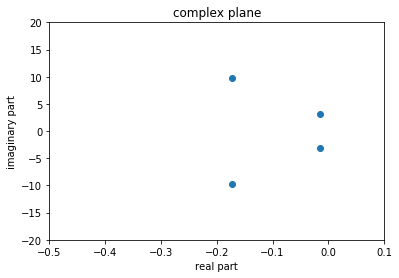

In [161]:
# Next we load a plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# the last line is necessary because we want plots to appear directly in the notebook

# Now let's look at the eigenvalues in the complex plane
plt.title('complex plane')
plt.scatter(eigenvalues.real, eigenvalues.imag)
plt.xlabel('real part')
plt.ylabel('imaginary part')
plt.xlim(-0.5,0.1)
plt.ylim(-20,20)
plt.show()

We see that we have two pairs of complex-conjugated eigenvalues.  
Each pair corresponds to one resonance frequency of the system. Both resonances have negative real part due to the damping.

### Eigendecomposition

For our $4 \times 4$ system matrix $\underline{\underline{A}}$ we now solved the eigenvalue problem. This means we know $\lambda_1, \, \lambda_2, \, \lambda_3, \, \lambda_4$ and $\underline{v}_1, \, \underline{v}_2, \, \underline{v}_3, \, \underline{v}_4$ such that
$$
\underline{\underline{A}} \cdot \underline{v}_i = \lambda_i \cdot \underline{v}_i \: \forall i \in \{ 1, \, 2, \, 3, \, 4 \}
$$

We can write these four equations at once using matrix notation:
$$
\underline{\underline{A}} \cdot \underline{\underline{V}} = \underline{\underline{D}} \cdot \underline{\underline{V}} \: ,
$$
where $\underline{\underline{V}}$ is the matrix that contains the eigenvectors as columns and $\underline{\underline{D}}$ is a diagonal matrix for which $D_{ii} = \lambda_i$ holds.

Hence, the eigendecomposition of $\underline{\underline{A}}$ is given by
$$
\underline{\underline{A}} = \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1}
$$

In [124]:
# we can verify this numerically for our example:
D = np.diag(eigenvalues)
A2 = np.dot(V, np.dot(D, np.linalg.inv(V)))
np.allclose(A, A2)

True

### Making sense of the eigendecomposition

The matrix $\underline{\underline{V}}$ can be thought of as an alternative set of basis vectors of $\underline{\underline{A}}$. This is true because $\underline{\underline{V}}$ has full rank.  
For our example, this means that $\underline{v}_1, \, \underline{v}_2, \, \underline{v}_3, \, \underline{v}_4$ are linearly independet and therefore span the entire $\mathbb{R}^4$.

In [44]:
np.linalg.matrix_rank(V)

4

To get a better understanding for what the eigendecomposition means geometrically read the equation
$$
\underline{\underline{A}} \cdot \underline{x} = \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot \underline{x}
$$
from right to left. First $\underline{x}$ gets projected via the map $\underline{\underline{V}}^{-1}$ into a space in which the dynamics are decoupled. In this space every coordinate only interacts with itself. This interaction is encoded by the diagonal matrix $\underline{\underline{D}}$. At last the coordinate transformation is undone by the map $\underline{\underline{V}}$.



### Expressing the matrix exponential in terms of the eigendecomposition

By definition the matrix exponential is defined through its power series expansion:

$$
\exp \left( \underline{\underline{A}} \cdot t \right) = 
\sum_{i=0}^{\infty} \frac{1}{i!} \left( \underline{\underline{A}} \cdot t \right)^i =
\underline{\underline{I}} + \underline{\underline{A}} \cdot t + \frac{1}{2} \cdot \underline{\underline{A}}^2 \cdot t^2 + \frac{1}{6} \cdot \underline{\underline{A}}^3 \cdot t^3 + \dots
$$
with $\underline{\underline{I}} = \underline{\underline{A}}^0 = \underline{\underline{V}} \cdot \underline{\underline{V}}^{-1}$ the identity matrix.

By plugging in the eigendecomposition of $\underline{\underline{A}}$ the expansion becomes
$$
\exp \left( \underline{\underline{A}} \cdot t \right) = 
\underline{\underline{I}} + \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot t + \frac{1}{2} \cdot \left( \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \right)^2 \cdot t^2 + \frac{1}{6} \cdot \left( \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \right)^3 \cdot t^3 + \dots = 
$$
$$
= \underline{\underline{V}} \cdot \underline{\underline{V}}^{-1} + \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot t + \frac{1}{2} \cdot \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot t^2 + \frac{1}{6} \cdot \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot t^3 + \dots =
$$
$$
= \underline{\underline{V}} \cdot \underline{\underline{I}} \cdot \underline{\underline{V}}^{-1} + \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot t + \frac{1}{2} \cdot \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot t^2 + \frac{1}{6} \cdot \underline{\underline{V}} \cdot \underline{\underline{D}} \cdot \underline{\underline{D}} \cdot \underline{\underline{D}} \cdot \underline{\underline{V}}^{-1} \cdot t^3 + \dots =
$$
$$
= \underline{\underline{V}} \cdot \left(
\underline{\underline{I}} + \underline{\underline{D}} \cdot t + \frac{1}{2} \cdot \underline{\underline{D}}^2 \cdot t^2 + \frac{1}{6} \underline{\underline{D}}^3 \cdot t^3 + \dots
\right) \cdot \underline{\underline{V}}^{-1} =
\underline{\underline{V}} \cdot \exp \left( \underline{\underline{D}} \cdot t \right) \cdot \underline{\underline{V}}^{-1}
$$

Since $\underline{\underline{D}} \in \mathbb{R}^{n \times n}$ is diagonal, computing $\exp \left( \underline{\underline{D}} \cdot t \right)$ is as easy as evaluating $n$ regular exponential functions:
$$
\left( \exp \left( \underline{\underline{D}} \cdot t \right) \right)_{ii} = \exp \left( D_{ii} \cdot t \right)
$$

## Frequency domain

In this section only the **input-output behavior of an LTI system** is relevant. Hence, the initial condition $\underline{x}(t_0)$ is taken to be the zero vector.

LTI systems are formulated as linear ODEs with time $t$ being the independent variable.
Neglecting the initial condition, you can think of such an ODE as a **linear operator that maps input signals to output signals**. When in doubt, please go back to the closed form solution of an LTI system and confirm that it is linar in the input signals $\underline{u}(t)$! Such a description of input-output behavior is called a **time-domain description**.
  
It is also possible to describe the input-output behavior in terms of individual **frequency components** of the input and output signals. Such a description is called a **frequency-domain description**.  

There exist links between time-domain and frequency-domain descriptions, namely the **Fourier transform** and the **Laplace transform**. For discrete-time systems analogous concepts exist. These are the discrete-time Fourier transform and the Z-transform but they will not be introduced in this tutorial.

### Frequency response of a system

A frequency-domain description of the input-output behavior of an LTI system may look like this:

<img src="images/FrequencyDomainFourier.png" alt="meaning of the Fourier transform for input-output behavior of an LTI system" style="width: 800px; margin-left: auto; margin-right: auto;"/>

The relevant input quantity is the frequency $\omega = 2 \cdot \pi \cdot f$ and the relevant output quantities are the amplitude $\hat{a}$ of the harmonic motion and its phase shift $\varphi$ relative to the input.

Amplitude and phase as functions of frequency are usually depicted by two stacked plots with amplitude and frequency axes both on a logarithmic scale in base 10. In particular the amplitude is expressed in decibels. Such a plot is called a **Bode plot** of the system's **frequency response**. An example will follow soon.

This description encodes information about the system's **response to any periodic excitation**, because of the **Fourier theorem** and the **superposition principle**. But the description captures only the **steady-state behavior**! This means that the described behavior and the actual behavior only match up when the system is excited by the same periodic input signal for a sufficient ammount of time. It takes less time for transient output behavior to disappear if more damping is present in the system.

For MIMO systems there exists one frequency response / Bode plot for each input-output pair.

### Example

We consider a slightly modified version of our simple example from mechanics:
<img src="images/TwoExcitedCarts.png" alt="two excited carts on a plane" style="width: 650px; margin-left: auto; margin-right: auto;"/>

This leads us to the following state space model:
$$
\underline{\dot{x}} =
\begin{bmatrix}
\dot{y}_1 \\ \dot{y}_2 \\ \dot{v}_1 \\ \dot{v}_2
\end{bmatrix} =
\underline{\underline{A}} \, \underline{x} + \underline{\underline{B}} \, \underline{u} = 
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-\frac{c_1 + c_2}{m_1} & \frac{c_2}{m_1} & -\frac{d_1 + d_2}{m_1} & \frac{d_2}{m_1} \\
\frac{c_2}{m_2} & -\frac{c_2}{m_2} & \frac{d_2}{m_2} & -\frac{d_2}{m_2}
\end{bmatrix}
\,
\begin{bmatrix}
y_1 \\ y_2 \\ v_1 \\ v_2
\end{bmatrix} +
\begin{bmatrix}
0 \\
0 \\
0 \\
\frac{1}{m_2} \\
\end{bmatrix}
\,
\begin{bmatrix}
F
\end{bmatrix}
$$

We will use this example to make sense of the input-output behavior descriptions in the frequency domain.

### Transfer function and Laplace transform

The following treatment will not be excessively rigorous nor comprehensive but it should motivate some interesting mathematical sturcture.

Recall that by Eulers formula we can write sinusoids as exponentials. The Laplace transform utilizes the **complex frequency** $s = \sigma + i \cdot \omega$ as its independent variable. Hence, the complex frequency not only encodes the (circular) frequency of a harmonic component but also its **growth rate** (real part).

The first property that we need is that differentiation in the time domain is the same as multiplication by $s$ in the frequency domain:
$$
\frac{\mathrm{d}}{\mathrm{d}t} \biggl( \exp \left( s \cdot t \right) \biggr) = s \cdot \exp \left( s \cdot t \right)
$$

We start with the state space representation of our generic LTI system:
$$
\dot{\underline{x}}(t) = \underline{\underline{A}} \cdot \underline{x}(t) + \underline{\underline{B}} \cdot \underline{u}(t)
\quad ; \quad
\underline{y}(t) = \underline{\underline{C}} \cdot \underline{x}(t) + \underline{\underline{D}} \cdot \underline{u}(t)
$$

Taking the Laplace transform (with initial conditions set to zero) gives us
$$
s \cdot \underline{X}(s) = \underline{\underline{A}} \cdot \underline{X}(s) + \underline{\underline{B}} \cdot \underline{U}(s)
\quad ; \quad
\underline{Y}(s) = \underline{\underline{C}} \cdot \underline{X}(s) + \underline{\underline{D}} \cdot \underline{U}(s)
$$
and after some simple algebraic manipulations we obtain
$$
\underline{Y}(s) = \underline{\underline{C}} \cdot \left( s \cdot \underline{\underline{I}} - \underline{\underline{A}} \right)^{-1} \cdot \underline{\underline{B}} \cdot \underline{U}(s) + \underline{\underline{D}} \cdot \underline{U}(s)
$$

The transfer function matrix $\underline{\underline{G}}(s)$ is defined by
$$
\underline{Y}(s) = \underline{\underline{G}}(s) \cdot \underline{U}(s) \: .
$$
Therefore we have
$$
\underline{\underline{G}}(s) = \underline{\underline{C}} \cdot \left( s \cdot \underline{\underline{I}} - \underline{\underline{A}} \right)^{-1} \cdot \underline{\underline{B}} + \underline{\underline{D}} \: .
$$

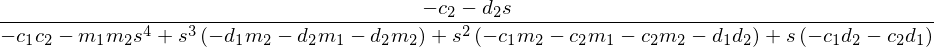

In [168]:
import sympy as sp
sp.init_printing()

s = sp.Symbol('s')
omega = sp.Symbol('omega')

M_1 = sp.Symbol('m_1')
M_2 = sp.Symbol('m_2')
D_1 = sp.Symbol('d_1')
D_2 = sp.Symbol('d_2')
C_1 = sp.Symbol('c_1')
C_2 = sp.Symbol('c_2')

A = sp.Matrix([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [-(C_1+C_2)/M_1, C_2/M_1, -(D_1+D_2)/M_1, D_2/M_1],
              [C_2/M_2, -C_2/M_2, D_2/M_2, -D_2/M_2]])
B = sp.Matrix([[0], [0], [0], [1/M_2]])
C = sp.Matrix([[1, 0, 0, 0], [0, 1, 0, 0]])

G = C.dot((s*sp.eye(4) - A).inv().dot(B))

G1 = G[0].simplify()
G1numer = sp.collect(sp.expand(sp.numer(G1)), s)
G1denom = sp.collect(sp.expand(sp.denom(G1)), s)
G1 = G1numer / G1denom
G1

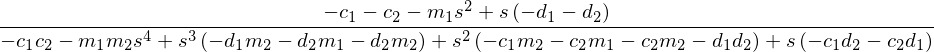

In [169]:
G2 = G[1].simplify()
G2numer = sp.collect(sp.expand(sp.numer(G2)), s)
G2denom = sp.collect(sp.expand(sp.denom(G2)), s)
G2 = G2numer / G2denom
G2

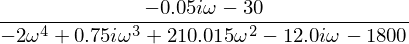

In [170]:
g1 = G1.subs({s:sp.I*omega, M_1:m_1, M_2:m_2, C_1:c_1, C_2:c_2, D_1:d_1, D_2:d_2})
g1

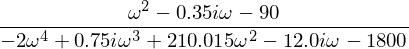

In [171]:
g2 = G2.subs({s:sp.I*omega, M_1:m_1, M_2:m_2, C_1:c_1, C_2:c_2, D_1:d_1, D_2:d_2})
g2

In [194]:
eigenvalues[0].imag

In [196]:
eigenvalues[2].imag

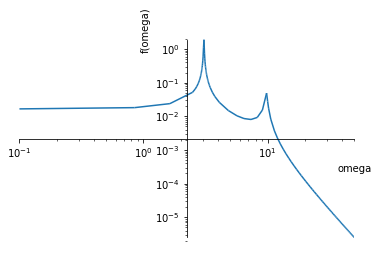

In [188]:
sp.plot(sp.Abs(g1), (omega, 0.1, 50), xscale='log', yscale='log');

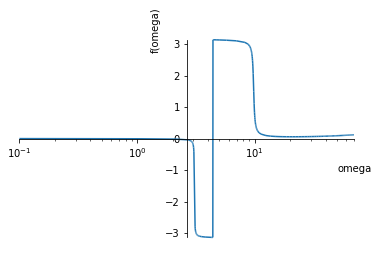

In [184]:
sp.plot(sp.arg(g1), (omega, 0.1, 70), xscale='log');

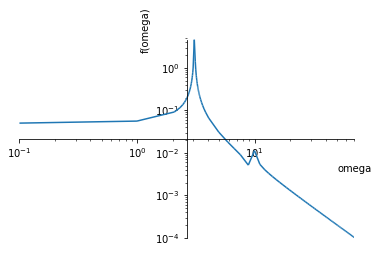

In [176]:
sp.plot(sp.Abs(g2), (omega, 0.1, 70), xscale='log', yscale='log');

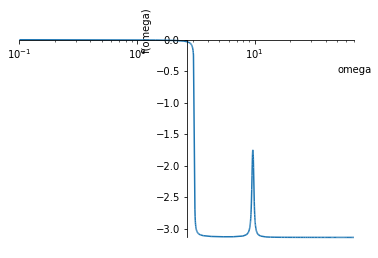

In [178]:
sp.plot(sp.arg(g2), (omega, 0.1, 70), xscale='log');

In [201]:
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [-(c_1+c_2)/m_1, c_2/m_1, -(d_1+d_2)/m_1, d_2/m_1],
              [c_2/m_2, -c_2/m_2, d_2/m_2, -d_2/m_2]])
B = np.array([[0], [0], [0], [1/m_2]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

def G(s):
    return np.dot(C, np.dot(np.linalg.inv(s*np.eye(4) - A), B))

print(abs(G(1j * eigenvalues[0].imag)[0]))
print(abs(G(1j * eigenvalues[0].imag)[1]))
print(abs(G(1j * eigenvalues[2].imag)[0]))
print(abs(G(1j * eigenvalues[2].imag)[1]))

[ 0.05144206]
[ 0.01118047]
[ 1.97976682]
[ 5.31833093]


Spectral

Since the impulse function contains all frequencies, the impulse response defines the response of a linear time-invariant system for all frequencies.

If we set $s = i \cdot \omega$, i.e. by setting the real part to zero, we obtain the Fourier transform.





## Stability of LTI systems

### BIBO stability

BIBO stands for bounded input bounded output. A LTI system is called BIBO stable if any bounded input results in a bounded output.  

A SISO system with input $u$ and output $y$ is BIBO stable if  
$\left| u(t) \right| \leq M < \infty \: \forall t \geq 0 \: \Rightarrow \: \left| y(t) \right| \leq N < \infty \: \forall t \geq 0$ for some $M,N \in \mathbb{R}$ (continuous-time) or  
$\left| u_k \right| \leq M < \infty \: \forall k \geq 0 \: \Rightarrow \: \left| y_k \right| \leq N < \infty \: \forall k \geq 0$ for some $M,N \in \mathbb{R}$ (discrete-time)

A MIMO system is BIBO stable if all input-output pairs are BIBO stable.

There exist various criteria to assess BIBO stability.

#### time-domain criterion

For continuous-time SISO systems the necessary and sufficient condition for BIBO stability in the time domain is that the **impulse response** $h$ of the system must be **absolutely integrable**, i.e. the $\mathrm{L}^1$ norm of $h(t)$ must exist:
$$
\int_{-\infty}^\infty \left| h(t) \right| \, \mathrm{d}t = \| h \|_1 < \infty
$$

Likewise for discrete-time SISO systems the necessary and sufficient condition for BIBO stability is that the impulse response $h_k$ of the system must be absolutely summable, i.e. the $\ell^1$ norm of $h_k$ must exist:
$$
\sum_{k=-\infty}^\infty \left| h_k \right| = \| h \|_1 < \infty
$$



#### frequency-domain criteria

For continuous-time SISO systems a sufficient and necessary condition for BIBO stability in the frequency domain is that all **poles of the transfer function** $G(s) = \frac{D(s)}{N(s)}$ **must have negative real part**:
$\Re(s_{\infty}) < 0 \: \forall s_{\infty} \in \mathbb{C} : N(s_{\infty})=0$  
This condition holds only for systems with a rational transfer function (no dead-time processes).

The **Hurwitz criterion** allows to test the above condition without actually computing the poles of $G(s)$. The criterion checks if all roots of N(s) have negative real part by evaluating subdeterminants (determinants of submatrices) of the so-called Hurwitz matrix $H$.

Given $N(s) = a_n \, s^n + a_{n-1} \, s^{n-1} + \dots + a_1 \, s + a_0$ the corresponding Hurwitz matrix is
$H = \begin{bmatrix}
a_{n-1} & a_{n-3} & a_{n-5} & \dots \\
a_n     & a_{n-2} & a_{n-4} & \dots \\
0       & a_{n-1} & a_{n-3} & \dots \\
0       & a_n     & a_{n-2} & \dots \\
0       & 0       & a_{n-1} & \dots \\
\vdots  & \vdots  & \vdots  & \ddots
\end{bmatrix} \in \mathbb{R}^{n \times n}$,  
where $a_i = 0$ if $i<0$.

For BIBO stability it is sufficient that all $n$ subdeterminants $H_1 = a_{n-1}$, $H_2 = \det{\begin{bmatrix}
a_{n-1} & a_{n-3} \\
a_n     & a_{n-2}
\end{bmatrix}}$, $\dots$, $H_n = \det(H)$ are positive.

Before doing all the computation it makes sense to check a necessary condition: All coefficients $a_n, \, \dots, a_0$ must be either all positive or all negative.  
The condition is also sufficient for $n \leq 2$.

## Euler's method, Runge-Kutta methods